In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr

yf.pdr_override() # <== that's all it takes :-)

# List of stock symbols for NSE
symbols_list = ['INFY']  # Add NSE stock symbols here

# Define start and end dates
start_date = '2023-12-06'
end_date = '2023-12-08'

# Download historical stock data
tata = pdr.get_data_yahoo("TATAMOTORS.NS", start_date, end_date)
# Display the downloaded data
print(tata.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High    Low       Close   Adj Close    Volume
Date                                                                       
2023-12-06  709.049988  724.799988  709.0  722.450012  722.450012  12148825
2023-12-07  725.000000  727.500000  716.0  721.950012  721.950012  10451801


In [22]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta 

from datetime import datetime
from pandas_datareader import data as pdr

yf.pdr_override() # <== that's all it takes :-)


import warnings
warnings.filterwarnings('ignore')

#sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0

tickers  = pd.read_html('https://ournifty.com/stock-list-in-nse-fo-futures-and-options.html#:~:text=NSE%20F%26O%20Stock%20List%3A%20%20%20%20SL,%20%201000%20%2052%20more%20rows%20')[0]

tickers = tickers.SYMBOL.to_list()

for count in range(len(tickers)):tickers[count] = tickers[count] + ".NS"


end_date = '2023-12-23'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

df = yf.download(tickers ,start_date, end_date).stack()




df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()
df








[*********************100%%**********************]  188 of 188 completed


4 Failed downloads:
['MIDCPNIFTY.NS', 'BANKNIFTY.NS', 'FINNIFTY.NS', 'NIFTY.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')


adj close        close         high          low  \
date       ticker                                                              
2015-12-28 AARTIIND.NS     121.271805   125.773811   128.057953   124.133606   
           ABB.NS         1074.056030  1118.900024  1131.900024  1115.000000   
           ABBOTINDIA.NS  5348.187500  5700.399902  5725.000000  5622.350098   
           ABFRL.NS        223.600006   223.600006   225.250000   217.100006   
           ACC.NS         1187.297729  1330.849976  1353.000000  1326.300049   
...                               ...          ...          ...          ...   
2023-12-22 VEDL.NS         259.750000   259.750000   261.350006   257.700012   
           VOLTAS.NS       947.599976   947.599976   954.450012   943.000000   
           WIPRO.NS        462.649994   462.649994   466.299988   434.000000   
           ZEEL.NS         267.549988   267.549988   272.649994   263.750000   
           ZYDUSLIFE.NS    679.950012   679.950012   689.400024   673.049988   

                                 open      volume  
date       ticker                                  
2015-12-28 AARTIIND.NS     124.133606    509686.0  
           ABB.NS         1115.300049     19844.0  
           ABBOTINDIA.NS  5622.350098      1698.0  
           ABFRL.NS        224.850006     29615.0  
           ACC.NS         1345.000000    167115.0  
...                               ...         ...  
2023-12-22 VEDL.NS         259.500000   9677532.0  
           VOLTAS.NS       950.000000   1665456.0  
           WIPRO.NS        435.299988  23040407.0  
           ZEEL.NS         266.200012  18959049.0  
           ZYDUSLIFE.NS    675.000000   2027527.0  

[350570 rows x 6 columns]

In [23]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
                                                          
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                          
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df

adj close        close         high          low  \
date       ticker                                                              
2015-12-28 AARTIIND.NS     121.271805   125.773811   128.057953   124.133606   
           ABB.NS         1074.056030  1118.900024  1131.900024  1115.000000   
           ABBOTINDIA.NS  5348.187500  5700.399902  5725.000000  5622.350098   
           ABFRL.NS        223.600006   223.600006   225.250000   217.100006   
           ACC.NS         1187.297729  1330.849976  1353.000000  1326.300049   
...                               ...          ...          ...          ...   
2023-12-22 VEDL.NS         259.750000   259.750000   261.350006   257.700012   
           VOLTAS.NS       947.599976   947.599976   954.450012   943.000000   
           WIPRO.NS        462.649994   462.649994   466.299988   434.000000   
           ZEEL.NS         267.549988   267.549988   272.649994   263.750000   
           ZYDUSLIFE.NS    679.950012   679.950012   689.400024   673.049988   

                                 open      volume  garman_klass_vol  \
date       ticker                                                     
2015-12-28 AARTIIND.NS     124.133606    509686.0          0.000274   
           ABB.NS         1115.300049     19844.0         -0.000435   
           ABBOTINDIA.NS  5622.350098      1698.0         -0.000802   
           ABFRL.NS        224.850006     29615.0          0.000667   
           ACC.NS         1345.000000    167115.0         -0.005810   
...                               ...         ...               ...   
2023-12-22 VEDL.NS         259.500000   9677532.0          0.000099   
           VOLTAS.NS       950.000000   1665456.0          0.000070   
           WIPRO.NS        435.299988  23040407.0          0.001142   
           ZEEL.NS         266.200012  18959049.0          0.000541   
           ZYDUSLIFE.NS    675.000000   2027527.0          0.000267   

                                rsi    bb_low    bb_mid   bb_high       atr  \
date       ticker                                                             
2015-12-28 AARTIIND.NS          NaN       NaN       NaN       NaN       NaN   
           ABB.NS               NaN       NaN       NaN       NaN       NaN   
           ABBOTINDIA.NS        NaN       NaN       NaN       NaN       NaN   
           ABFRL.NS             NaN       NaN       NaN       NaN       NaN   
           ACC.NS               NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2023-12-22 VEDL.NS        62.562842  5.439334  5.514843  5.590352 -0.289845   
           VOLTAS.NS      75.209907  6.673058  6.758292  6.843526  0.157745   
           WIPRO.NS       71.531872  5.967137  6.047407  6.127678  0.994296   
           ZEEL.NS        51.533740  5.495523  5.590437  5.685351  0.175275   
           ZYDUSLIFE.NS   63.743994  6.421730  6.475385  6.529041  1.622193   

                              macd  dollar_volume  
date       ticker                                  
2015-12-28 AARTIIND.NS         NaN      61.810541  
           ABB.NS              NaN      21.313568  
           ABBOTINDIA.NS       NaN       9.081222  
           ABFRL.NS            NaN       6.621914  
           ACC.NS              NaN     198.415260  
...                            ...            ...  
2023-12-22 VEDL.NS        1.333353    2513.738937  
           VOLTAS.NS      1.407615    1578.186065  
           WIPRO.NS       1.584892   10659.644158  
           ZEEL.NS        0.391215    5072.493329  
           ZYDUSLIFE.NS   1.531073    1378.617008  

[350570 rows x 14 columns]

In [24]:


last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data



dollar_volume    adj close  garman_klass_vol  \
date       ticker                                                        
2016-02-29 AARTIIND.NS        12.221054   100.248024         -0.000051   
           ABB.NS            199.368002   972.688232          0.002594   
           ABBOTINDIA.NS      19.646049  4490.473145         -0.001563   
           ABFRL.NS          420.337211   128.149994          0.001427   
           ACC.NS            208.001169  1070.144287         -0.003903   
...                                 ...          ...               ...   
2023-12-31 POLYCAB.NS       2722.566907  5359.299805          0.000834   
           INDIAMART.NS     1016.701565  2711.750000          0.000223   
           IRCTC.NS         9370.736595   860.900024          0.000617   
           SBICARD.NS       1619.754338   773.150024          0.000097   
           PVRINOX.NS       1116.928279  1700.800049          0.000292   

                                rsi    bb_low    bb_mid   bb_high       atr  \
date       ticker                                                             
2016-02-29 AARTIIND.NS    34.740117  4.576438  4.674966  4.773495 -1.188025   
           ABB.NS         43.075146  6.866371  6.943050  7.019730  0.029442   
           ABBOTINDIA.NS  36.711566  8.381688  8.423179  8.464671 -0.738825   
           ABFRL.NS       25.564487  4.784823  5.065249  5.345675  1.694221   
           ACC.NS         39.716062  6.971758  7.015867  7.059975 -0.876140   
...                             ...       ...       ...       ...       ...   
2023-12-31 POLYCAB.NS     49.685392  8.538601  8.603959  8.669317  2.642966   
           INDIAMART.NS   49.960017  7.839400  7.899164  7.958927 -0.291393   
           IRCTC.NS       67.262545  6.484281  6.642511  6.800741  1.493350   
           SBICARD.NS     53.431350  6.592236  6.629621  6.667006 -1.209619   
           PVRINOX.NS     47.624080  7.416344  7.461856  7.507368  0.279956   

                              macd  
date       ticker                   
2016-02-29 AARTIIND.NS   -0.448757  
           ABB.NS        -0.367772  
           ABBOTINDIA.NS -0.894438  
           ABFRL.NS      -3.349212  
           ACC.NS        -0.548019  
...                            ...  
2023-12-31 POLYCAB.NS     1.031411  
           INDIAMART.NS   0.136140  
           IRCTC.NS       2.327169  
           SBICARD.NS     0.167813  
           PVRINOX.NS     0.704303  

[16867 rows x 9 columns]

In [25]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                              
2017-01-31 ABB.NS         1054.745850         -0.000878  51.135270  6.894177   
           ABFRL.NS        150.050003          0.000355  61.129762  4.919827   
           ACC.NS         1275.287476         -0.003986  59.093177  7.057085   
           ADANIENT.NS      46.530159          0.001755  64.110846  3.685239   
           ADANIPORTS.NS   281.729004         -0.001130  54.094376  5.581867   
...                               ...               ...        ...       ...   
2023-12-31 POLYCAB.NS     5359.299805          0.000834  49.685392  8.538601   
           INDIAMART.NS   2711.750000          0.000223  49.960017  7.839400   
           IRCTC.NS        860.900024          0.000617  67.262545  6.484281   
           SBICARD.NS      773.150024          0.000097  53.431350  6.592236   
           PVRINOX.NS     1700.800049          0.000292  47.624080  7.416344   

                            bb_mid   bb_high       atr      macd  
date       ticker                                                 
2017-01-31 ABB.NS         6.968849  7.043522 -0.869278 -0.010741  
           ABFRL.NS       4.972208  5.024590 -1.378751  0.495368  
           ACC.NS         7.107652  7.158219 -1.076342  0.446812  
           ADANIENT.NS    3.786406  3.887573 -0.701097 -0.105940  
           ADANIPORTS.NS  5.638520  5.695174 -0.875197  0.206718  
...                            ...       ...       ...       ...  
2023-12-31 POLYCAB.NS     8.603959  8.669317  2.642966  1.031411  
           INDIAMART.NS   7.899164  7.958927 -0.291393  0.136140  
           IRCTC.NS       6.642511  6.800741  1.493350  2.327169  
           SBICARD.NS     6.629621  6.667006 -1.209619  0.167813  
           PVRINOX.NS     7.461856  7.507368  0.279956  0.704303  

[12516 rows x 8 columns]

In [26]:
#g=df.xs('TCS.NS',level=1)


def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                              
2018-01-31 ABB.NS         1595.744751          0.001192  70.902097  7.174701   
           ABFRL.NS        163.050003          0.000466  44.738309  5.075764   
           ACC.NS         1564.071411         -0.003600  41.426062  7.353811   
           ADANIENT.NS     114.435043          0.001007  71.059733  4.590045   
           ADANIPORTS.NS   413.218597         -0.000150  54.628362  5.976030   
...                               ...               ...        ...       ...   
2023-12-31 HDFCAMC.NS     3221.500000          0.000316  73.497884  7.953033   
           POLYCAB.NS     5359.299805          0.000834  49.685392  8.538601   
           INDIAMART.NS   2711.750000          0.000223  49.960017  7.839400   
           IRCTC.NS        860.900024          0.000617  67.262545  6.484281   
           SBICARD.NS      773.150024          0.000097  53.431350  6.592236   

                            bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                             
2018-01-31 ABB.NS         7.295923  7.417145  0.047272  1.172251   0.171758   
           ABFRL.NS       5.139473  5.203183 -0.859691 -0.337071  -0.054509   
           ACC.NS         7.400805  7.447799 -0.870714 -0.252515  -0.024539   
           ADANIENT.NS    4.683978  4.777911 -0.633296 -0.042579   0.281635   
           ADANIPORTS.NS  6.021848  6.067665 -0.434661  0.318023   0.057192   
...                            ...       ...       ...       ...        ...   
2023-12-31 HDFCAMC.NS     8.010338  8.067643  0.306103  1.261398   0.084844   
           POLYCAB.NS     8.603959  8.669317  2.642966  1.031411   0.017350   
           INDIAMART.NS   7.899164  7.958927 -0.291393  0.136140   0.041359   
           IRCTC.NS       6.642511  6.800741  1.493350  2.327169   0.219837   
           SBICARD.NS     6.629621  6.667006 -1.209619  0.167813   0.045999   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2018-01-31 ABB.NS          0.087055   0.060563   0.025546   0.017870   
           ABFRL.NS       -0.013520   0.012899  -0.009346  -0.006368   
           ACC.NS          0.014095  -0.017673  -0.001734   0.006632   
           ADANIENT.NS     0.205942   0.172400   0.075319   0.078082   
           ADANIPORTS.NS   0.038033  -0.001163   0.013413   0.030718   
...                             ...        ...        ...        ...   
2023-12-31 HDFCAMC.NS      0.085500   0.067604   0.058097   0.072581   
           POLYCAB.NS      0.043467   0.001013   0.071001   0.072114   
           INDIAMART.NS    0.011660  -0.019445  -0.006162   0.009392   
           IRCTC.NS        0.139598   0.082681   0.053194   0.047099   
           SBICARD.NS      0.017932  -0.007621  -0.015128   0.004851   

                          return_12m  
date       ticker                     
2018-01-31 ABB.NS           0.034644  
           ABFRL.NS         0.006948  
           ACC.NS           0.017156  
           ADANIENT.NS      0.077876  
           ADANIPORTS.NS    0.032434  
...                              ...  
2023-12-31 HDFCAMC.NS       0.034232  
           POLYCAB.NS       0.063691  
           INDIAMART.NS     0.019723  
           IRCTC.NS         0.026103  
           SBICARD.NS      -0.002079  

[10447 rows x 14 columns]

In [28]:
# Provide the path to your CSV file
csv_file_path = r'C:\Users\91908\algotrading\2023-03_FourFactors_and_Market_Returns_Monthly_SurvivorshipBiasAdjusted.csv'

# Read the CSV file into a DataFrame
factor_data = pd.read_csv(csv_file_path)

# Print the column names
print(factor_data.columns)

# Find the index of the 'Date' column
date_column_index = factor_data.columns.get_loc('Date')

# Print the index
print(f"Index of 'Date' column: {date_column_index}")

# Assuming factor_data is your DataFrame
factor_data['Date'] = pd.to_datetime(factor_data['Date'], format='%Y-%m', errors='coerce').dt.strftime('%Y-%m-%d')
factor_data['Date'] = pd.to_datetime(factor_data['Date']) + pd.offsets.MonthEnd(0)

factor_data = factor_data.rename(columns={'Date': 'date'})
factor_data = factor_data.set_index('date')

factor_data.index



factor_data=factor_data.join(data['return_1m']).sort_index()

factor_data

#factor_data.xs('TCS.NS', level=1).head()

Index(['Date', 'SMB', 'HML', 'WML', 'MF', 'RF'], dtype='object')
Index of 'Date' column: 0


SMB       HML       WML        MF        RF  \
date       ticker                                                            
2018-01-31 ABB.NS        -3.309834 -0.943876  0.394180 -0.603800  0.554680   
           ABFRL.NS      -3.309834 -0.943876  0.394180 -0.603800  0.554680   
           ACC.NS        -3.309834 -0.943876  0.394180 -0.603800  0.554680   
           ADANIENT.NS   -3.309834 -0.943876  0.394180 -0.603800  0.554680   
           ADANIPORTS.NS -3.309834 -0.943876  0.394180 -0.603800  0.554680   
...                            ...       ...       ...       ...       ...   
2023-03-31 VEDL.NS       -2.514654  1.172053  1.264843  0.230031  0.565059   
           VOLTAS.NS     -2.514654  1.172053  1.264843  0.230031  0.565059   
           WIPRO.NS      -2.514654  1.172053  1.264843  0.230031  0.565059   
           ZEEL.NS       -2.514654  1.172053  1.264843  0.230031  0.565059   
           ZYDUSLIFE.NS  -2.514654  1.172053  1.264843  0.230031  0.565059   

                          return_1m  
date       ticker                    
2018-01-31 ABB.NS          0.171758  
           ABFRL.NS       -0.054509  
           ACC.NS         -0.024539  
           ADANIENT.NS     0.281635  
           ADANIPORTS.NS   0.057192  
...                             ...  
2023-03-31 VEDL.NS         0.022732  
           VOLTAS.NS      -0.082679  
           WIPRO.NS       -0.056323  
           ZEEL.NS         0.085123  
           ZYDUSLIFE.NS    0.055281  

[9119 rows x 6 columns]

In [213]:
factor_data.xs('ACC.NS', level=1).head()

,SMB,HML,WML,MF,RF,return_1m
date,,,,,,
2019-12-31,-1.242428,0.010184,3.167983,-0.339354,0.426726,-0.050258
2020-01-31,7.940916,-3.689390,0.773184,0.834946,0.420191,0.040777
2020-02-29,-0.556223,-8.706731,10.797154,-6.350149,0.381843,-0.122125
2020-03-31,-13.948593,-7.518732,14.032913,-18.925697,0.425064,-0.237650
2020-04-30,1.869469,6.964859,-12.017284,13.850854,0.332540,0.208838


In [29]:
factor_data.groupby(level=1).size()


ticker
ABB.NS           8
ABCAPITAL.NS    22
ABFRL.NS        19
ACC.NS          63
ADANIENT.NS     63
                ..
VEDL.NS         63
VOLTAS.NS       63
WIPRO.NS        63
ZEEL.NS         63
ZYDUSLIFE.NS    63
Length: 168, dtype: int64

In [30]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

SMB       HML       WML        MF        RF  \
date       ticker                                                            
2018-01-31 ABFRL.NS      -3.309834 -0.943876  0.394180 -0.603800  0.554680   
           ACC.NS        -3.309834 -0.943876  0.394180 -0.603800  0.554680   
           ADANIENT.NS   -3.309834 -0.943876  0.394180 -0.603800  0.554680   
           ADANIPORTS.NS -3.309834 -0.943876  0.394180 -0.603800  0.554680   
           AMBUJACEM.NS  -3.309834 -0.943876  0.394180 -0.603800  0.554680   
...                            ...       ...       ...       ...       ...   
2023-03-31 VEDL.NS       -2.514654  1.172053  1.264843  0.230031  0.565059   
           VOLTAS.NS     -2.514654  1.172053  1.264843  0.230031  0.565059   
           WIPRO.NS      -2.514654  1.172053  1.264843  0.230031  0.565059   
           ZEEL.NS       -2.514654  1.172053  1.264843  0.230031  0.565059   
           ZYDUSLIFE.NS  -2.514654  1.172053  1.264843  0.230031  0.565059   

                          return_1m  
date       ticker                    
2018-01-31 ABFRL.NS       -0.054509  
           ACC.NS         -0.024539  
           ADANIENT.NS     0.281635  
           ADANIPORTS.NS   0.057192  
           AMBUJACEM.NS   -0.037677  
...                             ...  
2023-03-31 VEDL.NS         0.022732  
           VOLTAS.NS      -0.082679  
           WIPRO.NS       -0.056323  
           ZEEL.NS         0.085123  
           ZYDUSLIFE.NS    0.055281  

[9081 rows x 6 columns]

In [31]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

SMB       HML       WML        MF        RF
date       ticker                                                         
2018-01-31 ABFRL.NS            NaN       NaN       NaN       NaN       NaN
           ACC.NS              NaN       NaN       NaN       NaN       NaN
           ADANIENT.NS         NaN       NaN       NaN       NaN       NaN
           ADANIPORTS.NS       NaN       NaN       NaN       NaN       NaN
           AMBUJACEM.NS        NaN       NaN       NaN       NaN       NaN
...                            ...       ...       ...       ...       ...
2023-03-31 VEDL.NS       -0.001801  0.002813  0.002039  0.013775  0.053751
           VOLTAS.NS     -0.000649  0.003906 -0.004086  0.004316 -0.182991
           WIPRO.NS       0.000238  0.000068  0.006534  0.007624 -0.054376
           ZEEL.NS        0.000357  0.008156 -0.006617  0.019846  0.049765
           ZYDUSLIFE.NS   0.001608  0.004201  0.001394  0.003398  0.303021

[9081 rows x 5 columns]

In [32]:
#data = data.join(betas.groupby('ticker').shift(), rsuffix='_beta')
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                              
2018-01-31 ABB.NS         1595.744751          0.001192  70.902097  7.174701   
           ABFRL.NS        163.050003          0.000466  44.738309  5.075764   
           ACC.NS         1564.071411         -0.003600  41.426062  7.353811   
           ADANIENT.NS     114.435043          0.001007  71.059733  4.590045   
           ADANIPORTS.NS   413.218597         -0.000150  54.628362  5.976030   
...                               ...               ...        ...       ...   
2023-12-31 HDFCAMC.NS     3221.500000          0.000316  73.497884  7.953033   
           POLYCAB.NS     5359.299805          0.000834  49.685392  8.538601   
           INDIAMART.NS   2711.750000          0.000223  49.960017  7.839400   
           IRCTC.NS        860.900024          0.000617  67.262545  6.484281   
           SBICARD.NS      773.150024          0.000097  53.431350  6.592236   

                            bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                             
2018-01-31 ABB.NS         7.295923  7.417145  0.047272  1.172251   0.171758   
           ABFRL.NS       5.139473  5.203183 -0.859691 -0.337071  -0.054509   
           ACC.NS         7.400805  7.447799 -0.870714 -0.252515  -0.024539   
           ADANIENT.NS    4.683978  4.777911 -0.633296 -0.042579   0.281635   
           ADANIPORTS.NS  6.021848  6.067665 -0.434661  0.318023   0.057192   
...                            ...       ...       ...       ...        ...   
2023-12-31 HDFCAMC.NS     8.010338  8.067643  0.306103  1.261398   0.084844   
           POLYCAB.NS     8.603959  8.669317  2.642966  1.031411   0.017350   
           INDIAMART.NS   7.899164  7.958927 -0.291393  0.136140   0.041359   
           IRCTC.NS       6.642511  6.800741  1.493350  2.327169   0.219837   
           SBICARD.NS     6.629621  6.667006 -1.209619  0.167813   0.045999   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2018-01-31 ABB.NS          0.087055   0.060563   0.025546   0.017870   
           ABFRL.NS       -0.013520   0.012899  -0.009346  -0.006368   
           ACC.NS          0.014095  -0.017673  -0.001734   0.006632   
           ADANIENT.NS     0.205942   0.172400   0.075319   0.078082   
           ADANIPORTS.NS   0.038033  -0.001163   0.013413   0.030718   
...                             ...        ...        ...        ...   
2023-12-31 HDFCAMC.NS      0.085500   0.067604   0.058097   0.072581   
           POLYCAB.NS      0.043467   0.001013   0.071001   0.072114   
           INDIAMART.NS    0.011660  -0.019445  -0.006162   0.009392   
           IRCTC.NS        0.139598   0.082681   0.053194   0.047099   
           SBICARD.NS      0.017932  -0.007621  -0.015128   0.004851   

                          return_12m  
date       ticker                     
2018-01-31 ABB.NS           0.034644  
           ABFRL.NS         0.006948  
           ACC.NS           0.017156  
           ADANIENT.NS      0.077876  
           ADANIPORTS.NS    0.032434  
...                              ...  
2023-12-31 HDFCAMC.NS       0.034232  
           POLYCAB.NS       0.063691  
           INDIAMART.NS     0.019723  
           IRCTC.NS         0.026103  
           SBICARD.NS      -0.002079  

[10447 rows x 14 columns]

In [33]:
 factors = ['SMB','HML','WML','MF','RF']

#factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data.info()



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10076 entries, (Timestamp('2018-01-31 00:00:00'), 'ACC.NS') to (Timestamp('2023-12-31 00:00:00'), 'HDFCAMC.NS')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10076 non-null  float64
 1   rsi               10076 non-null  float64
 2   bb_low            10076 non-null  float64
 3   bb_mid            10076 non-null  float64
 4   bb_high           10076 non-null  float64
 5   atr               10076 non-null  float64
 6   macd              10076 non-null  float64
 7   return_1m         10076 non-null  float64
 8   return_2m         10076 non-null  float64
 9   return_3m         10076 non-null  float64
 10  return_6m         10076 non-null  float64
 11  return_9m         10076 non-null  float64
 12  return_12m        10076 non-null  float64
 13  SMB               10076 non-null  float64
 14  HML               10076 non-null  float64
 15  W

In [35]:
from sklearn.cluster import KMeans

if 'cluster' in data.columns:
    data = data.drop('cluster', axis=1)

# Define initial_centroids here
initial_centroids = 'k-means++'


def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=2,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low    bb_mid  \
date       ticker                                                           
2018-01-31 ACC.NS                -0.003600  41.426062  7.353811  7.400805   
           ADANIENT.NS            0.001007  71.059733  4.590045  4.683978   
           ADANIPORTS.NS         -0.000150  54.628362  5.976030  6.021848   
           AMBUJACEM.NS          -0.006892  41.885996  5.422523  5.466961   
           APOLLOHOSP.NS          0.000554  51.979428  6.994828  7.034182   
...                                    ...        ...       ...       ...   
2023-12-31 ICICIGI.NS             0.000108  50.642161  7.253997  7.278278   
           SBILIFE.NS             0.000163  47.679239  7.236727  7.272430   
           HDFCLIFE.NS            0.000136  43.402677  6.465194  6.513430   
           BANDHANBNK.NS          0.000498  51.467396  5.376675  5.466139   
           HDFCAMC.NS             0.000316  73.497884  7.953033  8.010338   

                           bb_high       atr      macd  return_1m  return_2m  \
date       ticker                                                              
2018-01-31 ACC.NS         7.447799 -0.870714 -0.252515  -0.024539   0.014095   
           ADANIENT.NS    4.777911 -0.633296 -0.042579   0.281635   0.205942   
           ADANIPORTS.NS  6.067665 -0.434661  0.318023   0.057192   0.038033   
           AMBUJACEM.NS   5.511400 -0.607025 -0.382254  -0.037677  -0.001334   
           APOLLOHOSP.NS  7.073535 -0.913632 -0.328621  -0.034860   0.025218   
...                            ...       ...       ...        ...        ...   
2023-12-31 ICICIGI.NS     7.302559 -0.551819  0.057840  -0.038784   0.017606   
           SBILIFE.NS     7.308134  0.380323  0.312294  -0.028532   0.009622   
           HDFCLIFE.NS    6.561665  0.223995 -0.081953  -0.073688   0.017236   
           BANDHANBNK.NS  5.555603 -1.112079  0.430144   0.038479   0.047104   
           HDFCAMC.NS     8.067643  0.306103  1.261398   0.084844   0.085500   

                          return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                       
2018-01-31 ACC.NS         -0.017673  -0.001734   0.006632    0.017156   
           ADANIENT.NS     0.172400   0.075319   0.078082    0.077876   
           ADANIPORTS.NS  -0.001163   0.013413   0.030718    0.032434   
           AMBUJACEM.NS   -0.023894   0.000168   0.007675    0.012153   
           APOLLOHOSP.NS   0.038387  -0.012259  -0.005910   -0.004220   
...                             ...        ...        ...         ...   
2023-12-31 ICICIGI.NS      0.029252   0.010083   0.033152    0.012426   
           SBILIFE.NS      0.022204   0.010848   0.026579    0.010612   
           HDFCLIFE.NS     0.001280  -0.002926   0.028341    0.010512   
           BANDHANBNK.NS  -0.022772  -0.003964   0.021162    0.000762   
           HDFCAMC.NS      0.067604   0.058097   0.072581    0.034232   

                               SMB       HML       WML        MF        RF  \
date       ticker                                                            
2018-01-31 ACC.NS         0.000243 -0.002684 -0.000463  0.009375 -0.092101   
           ADANIENT.NS    0.005136  0.004355  0.003524  0.013366 -0.335105   
           ADANIPORTS.NS -0.001658  0.002056 -0.002400  0.010804 -0.052731   
           AMBUJACEM.NS   0.001102 -0.004727 -0.001539  0.008694 -0.223198   
           APOLLOHOSP.NS  0.001996 -0.007010  0.004966  0.013159 -0.281501   
...                            ...       ...       ...       ...       ...   
2023-12-31 ICICIGI.NS    -0.005227  0.000742 -0.000819  0.013438  0.242250   
           SBILIFE.NS    -0.000788  0.001102  0.001247  0.012815  0.311355   
           HDFCLIFE.NS   -0.002974 -0.001034 -0.002386  0.010529  0.065319   
           BANDHANBNK.NS -0.005763  0.009458 -0.004571  0.006547  0.312739   
           HDFCAMC.NS    -0.002784 -0.002296 -0.002586  0.014253  0.222097   

                  

In [36]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,0] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,0] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,0] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,0] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

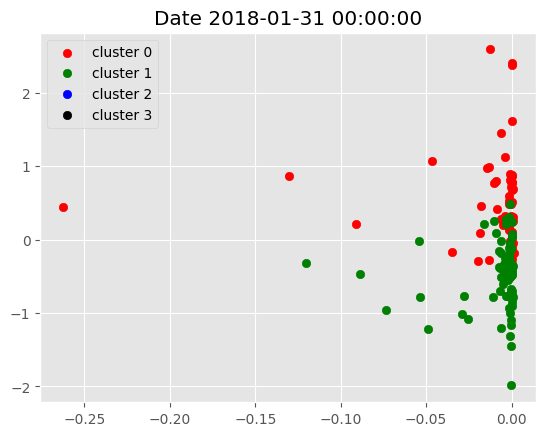

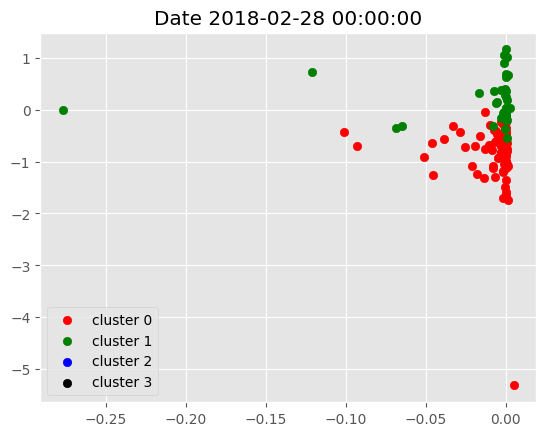

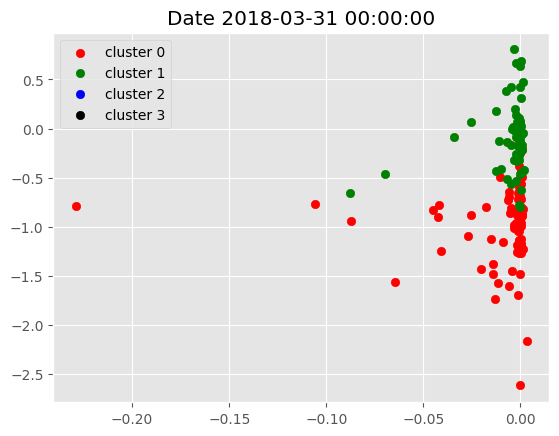

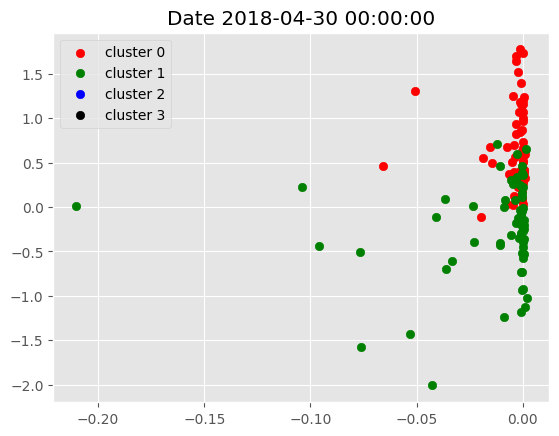

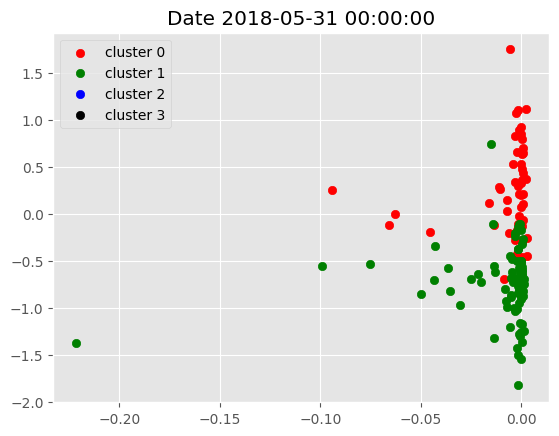

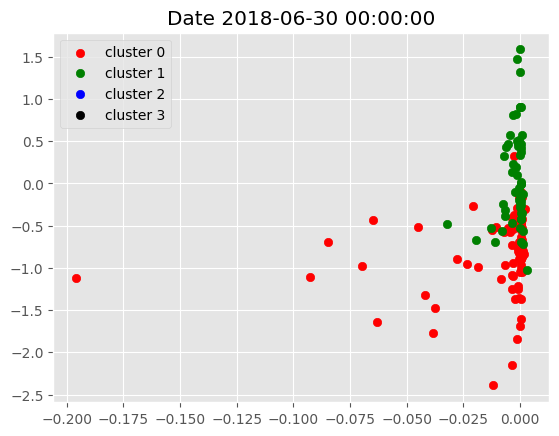

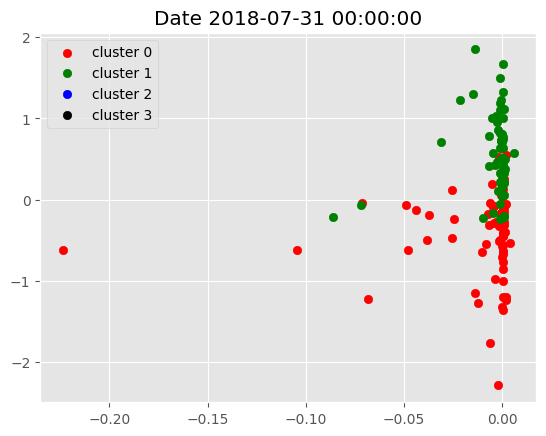

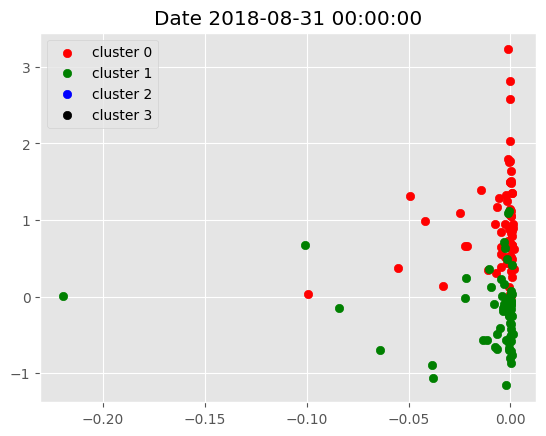

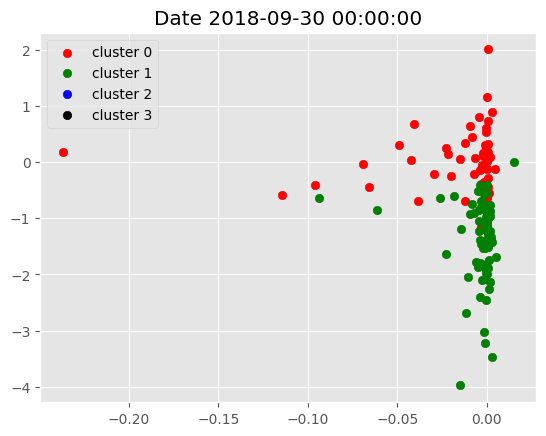

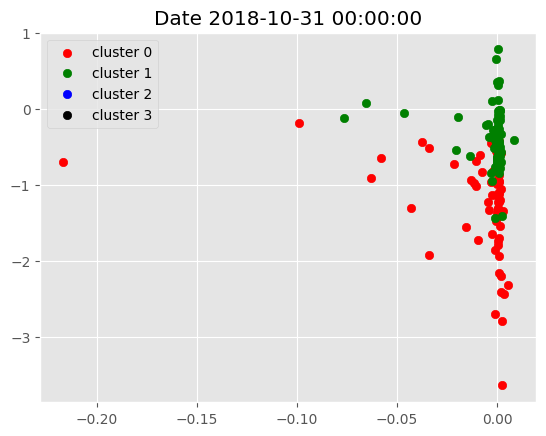

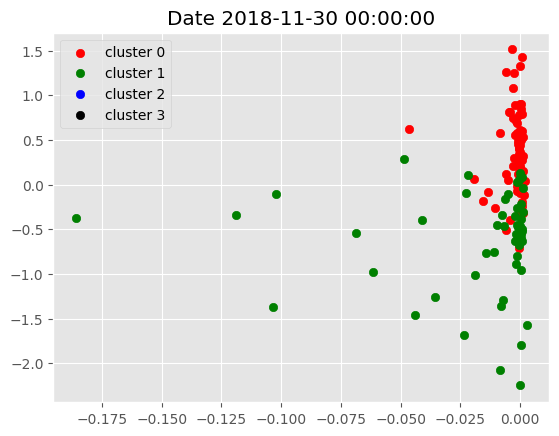

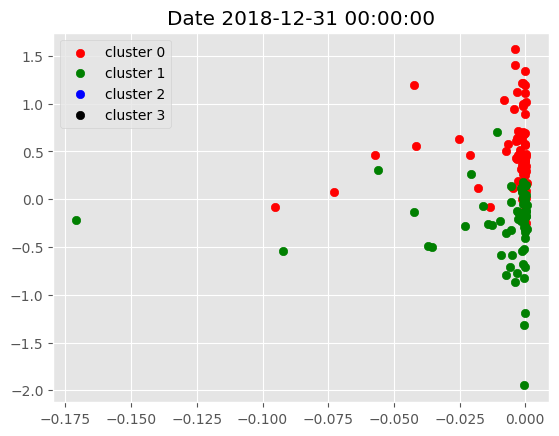

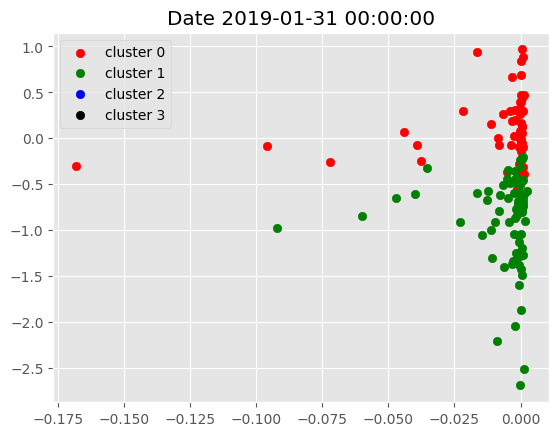

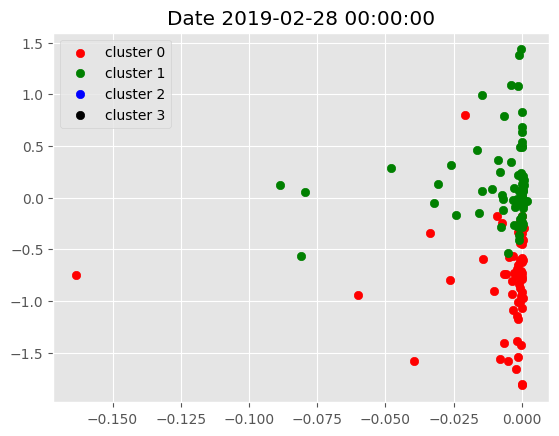

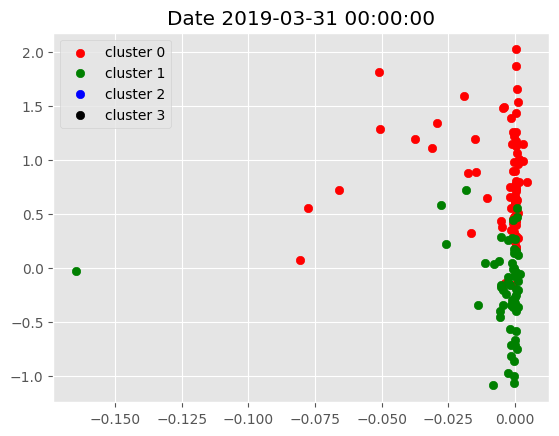

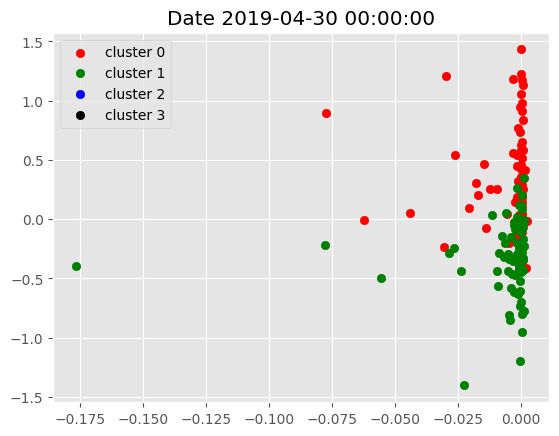

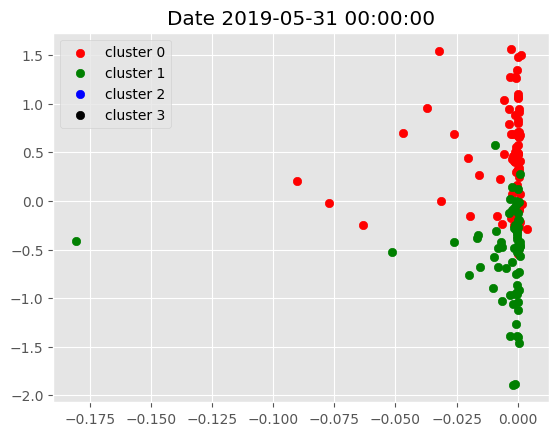

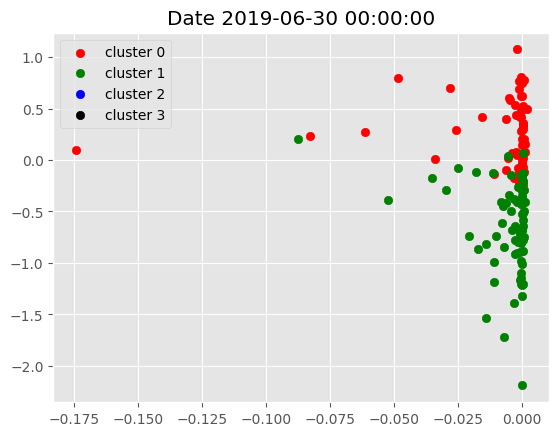

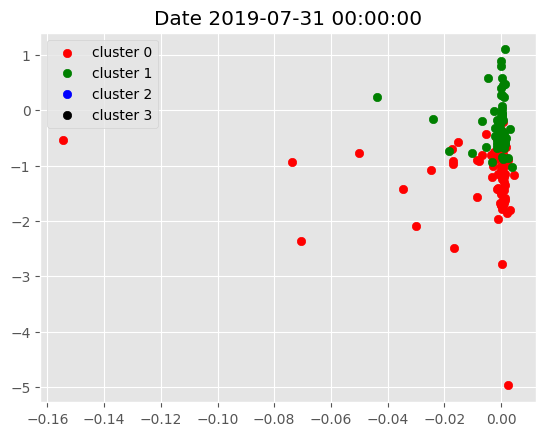

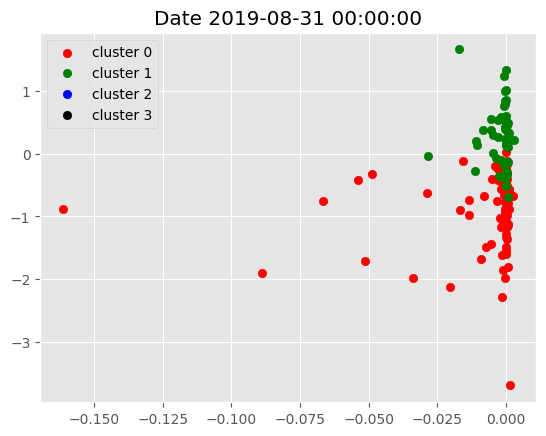

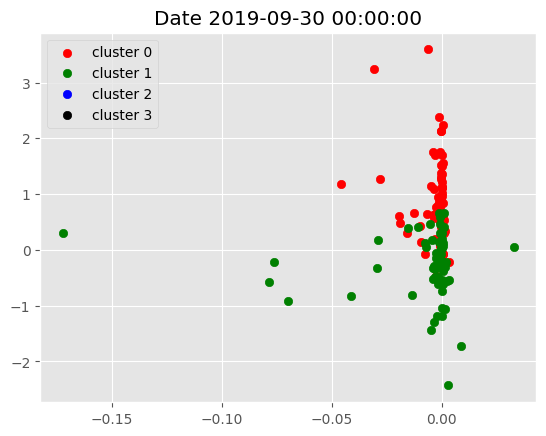

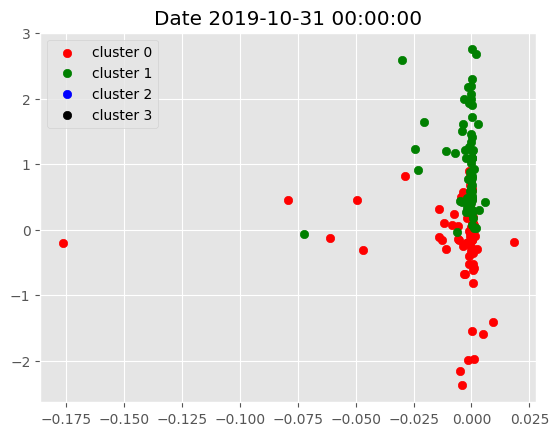

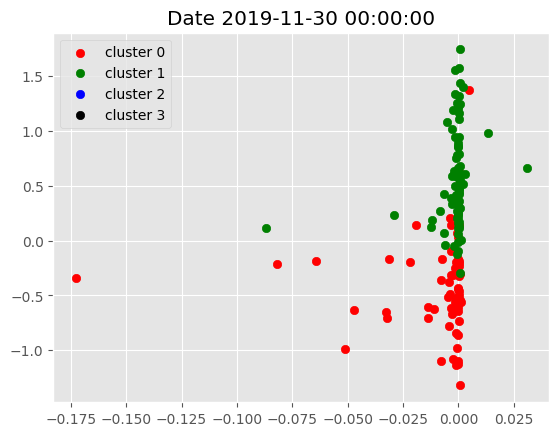

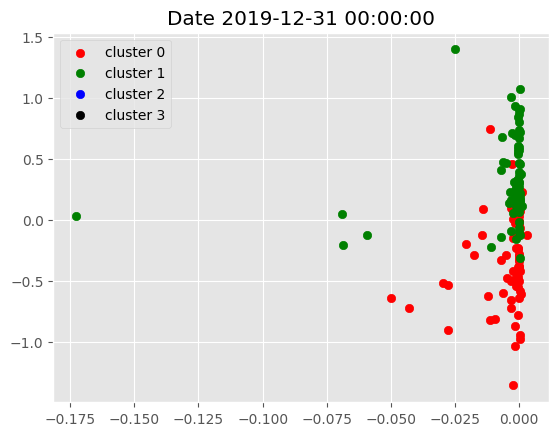

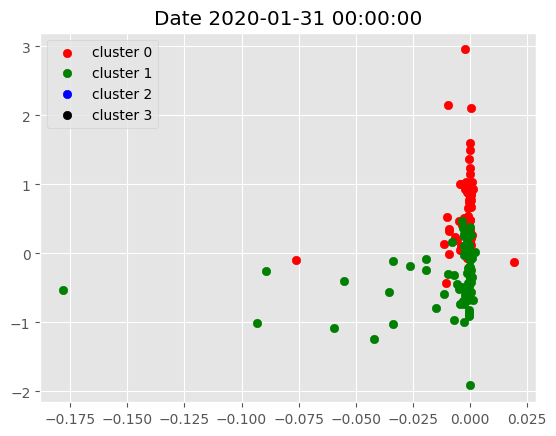

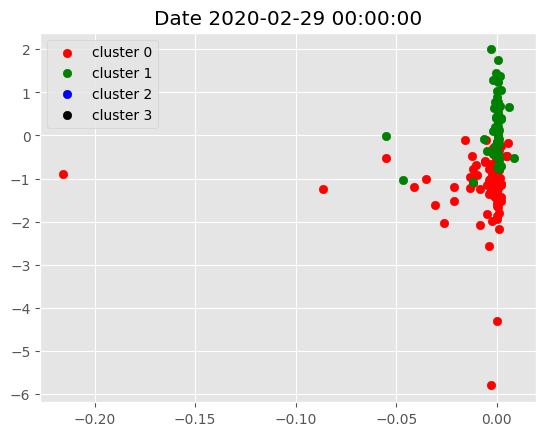

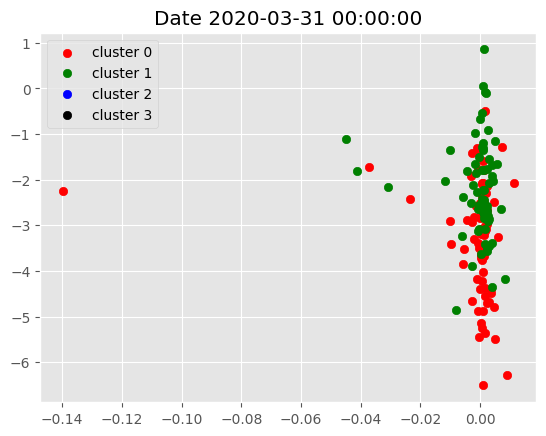

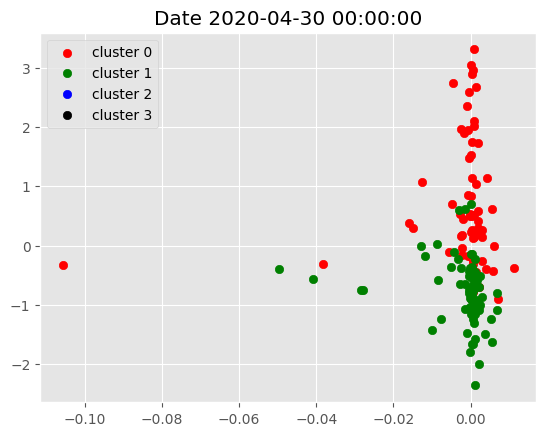

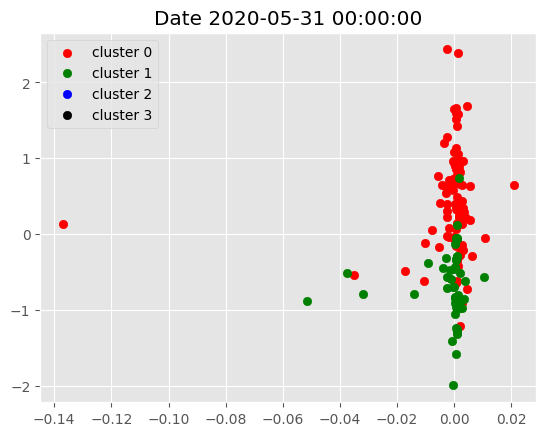

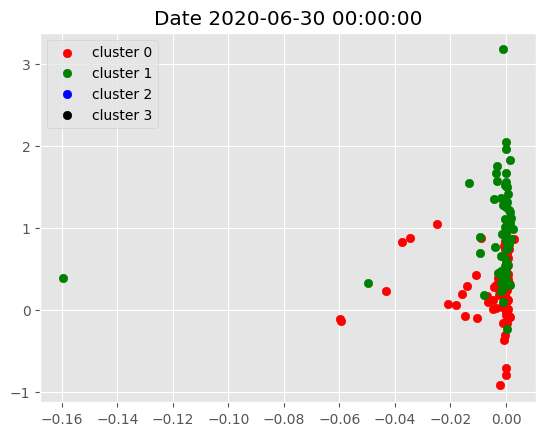

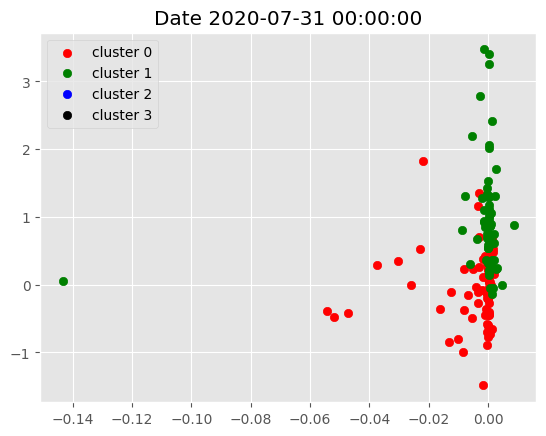

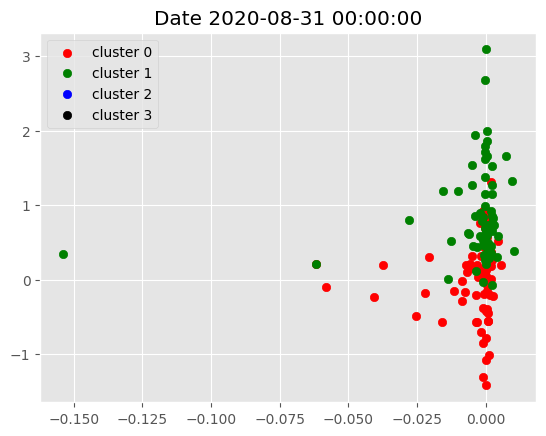

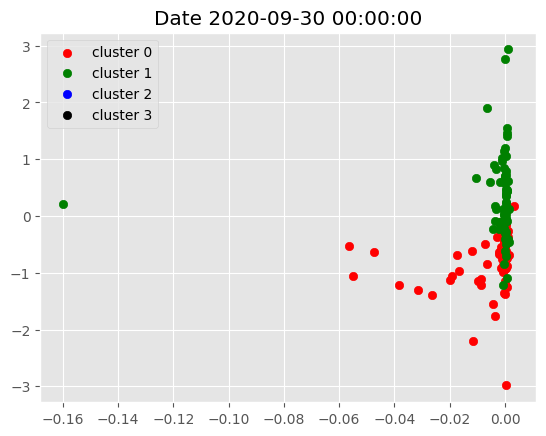

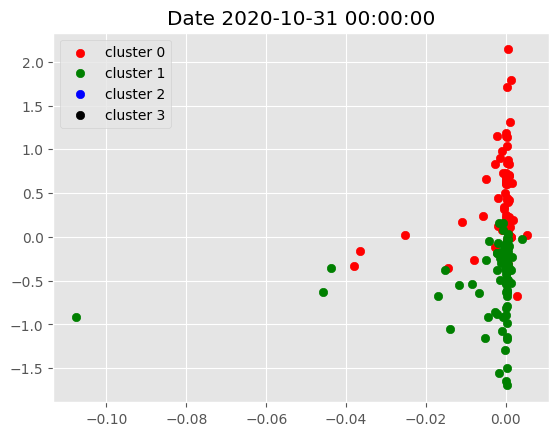

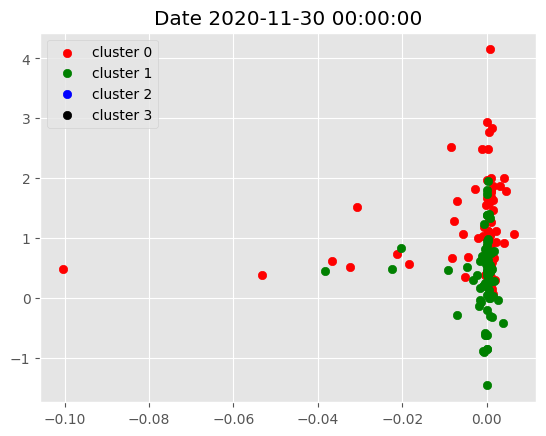

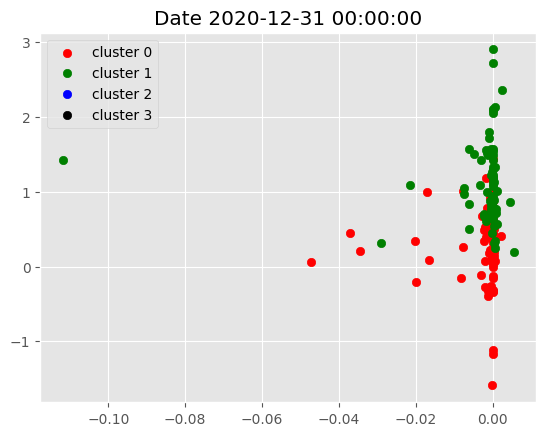

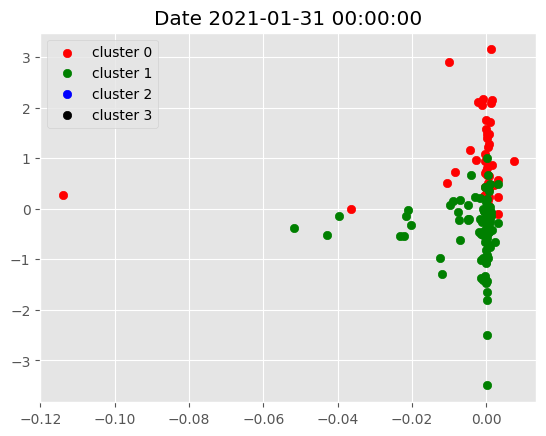

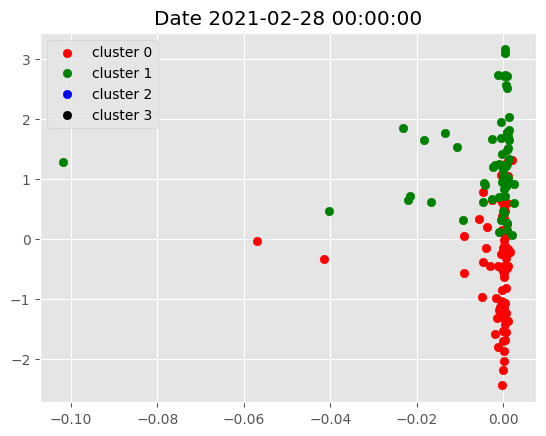

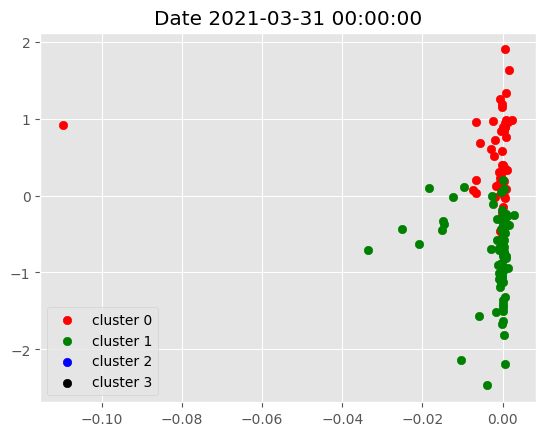

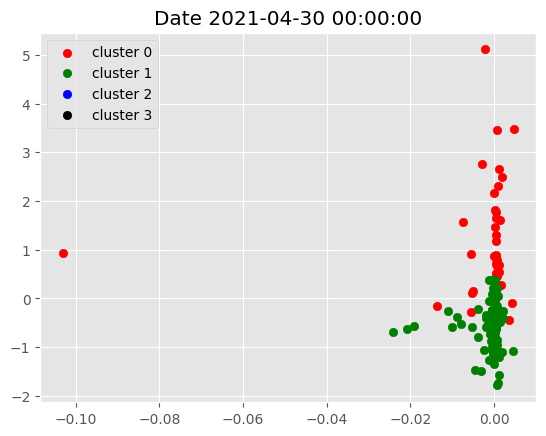

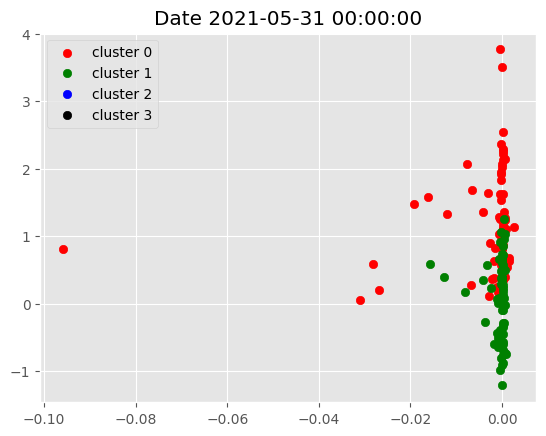

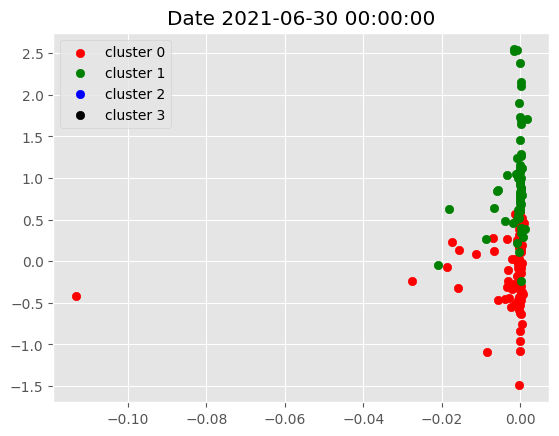

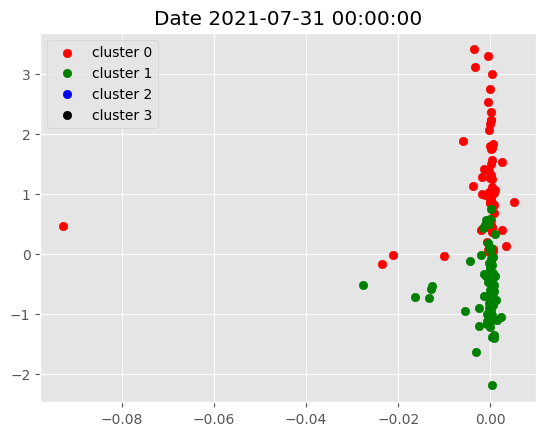

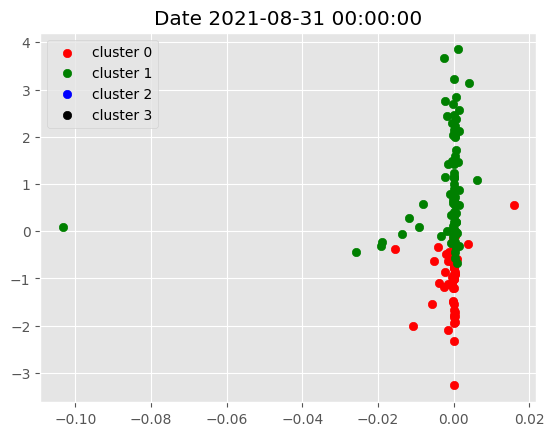

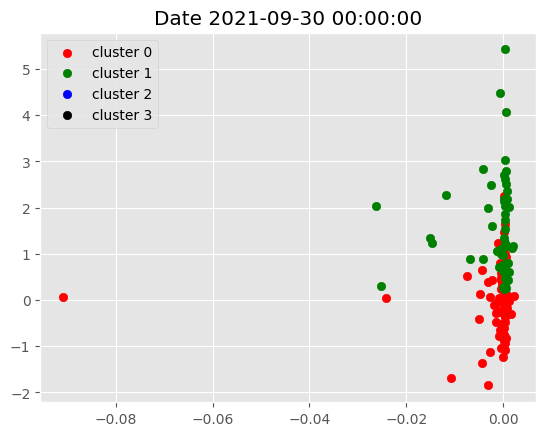

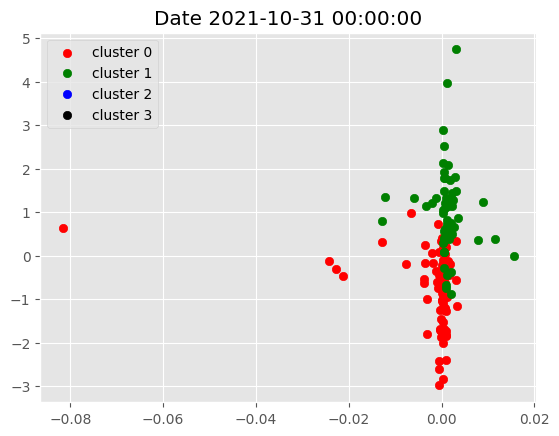

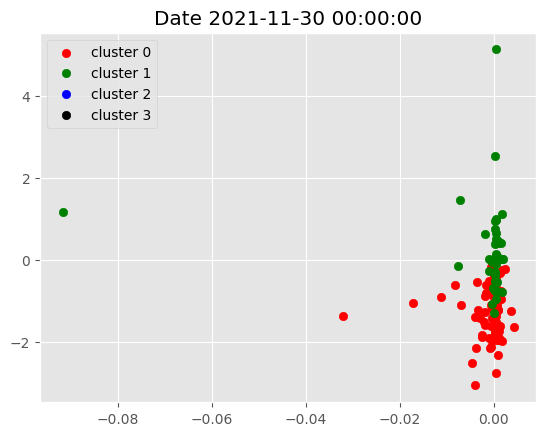

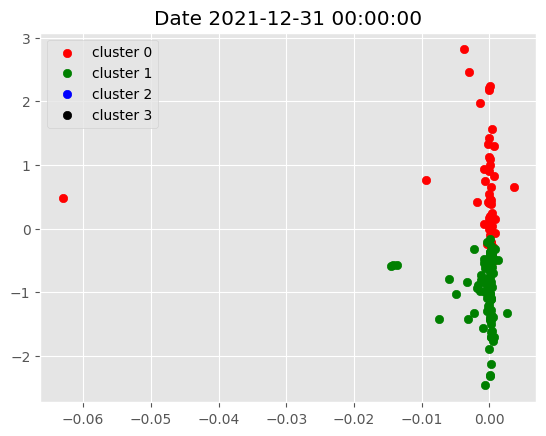

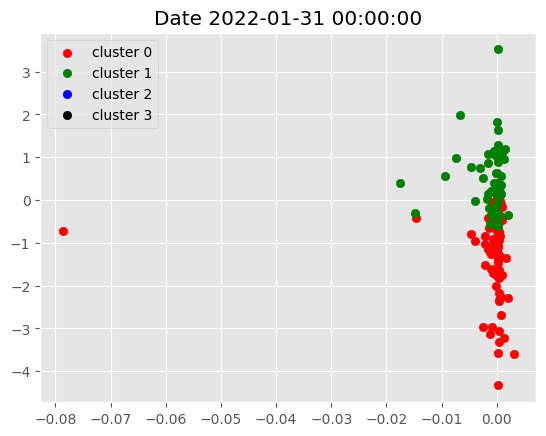

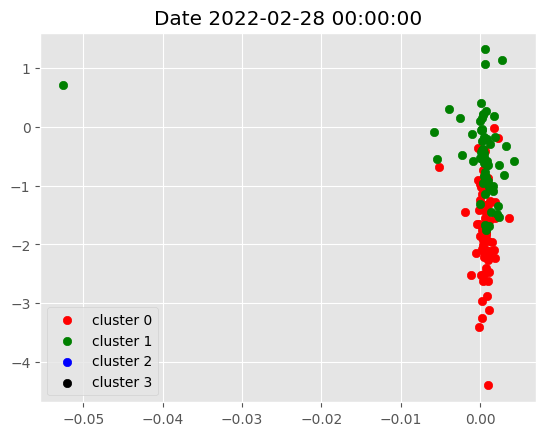

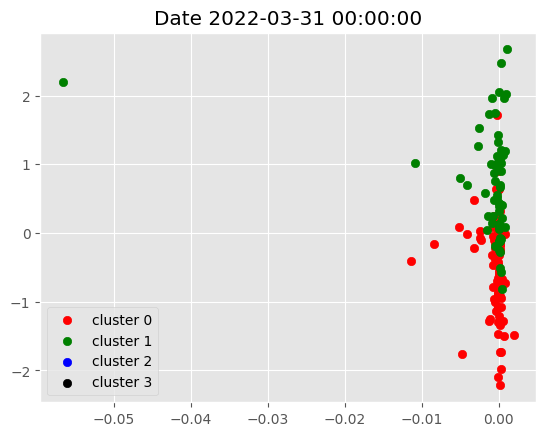

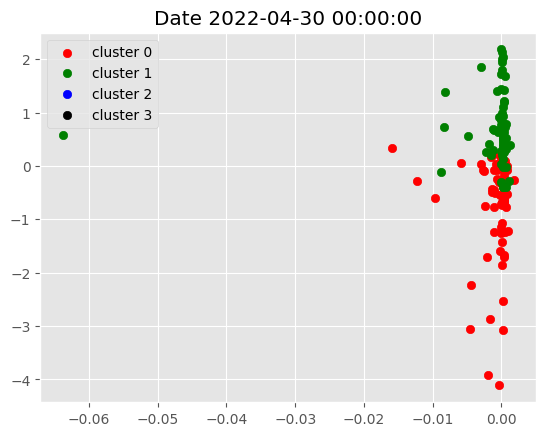

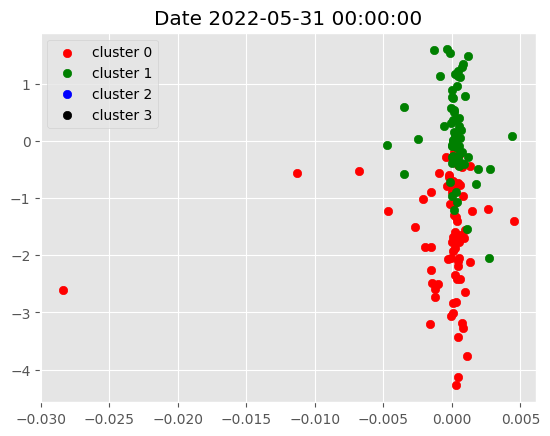

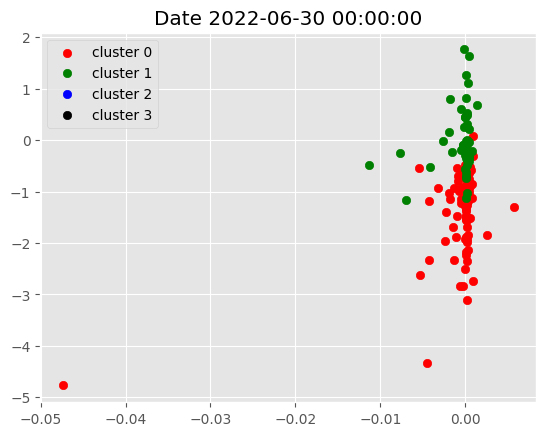

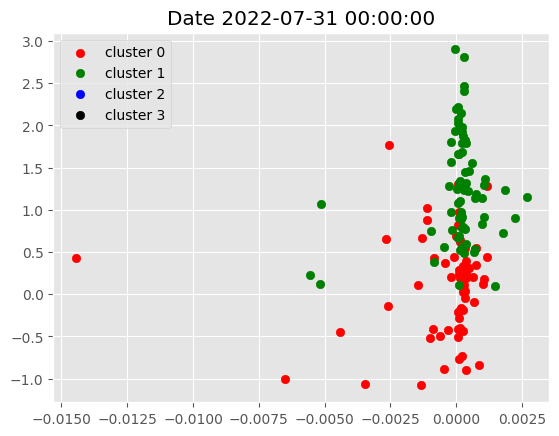

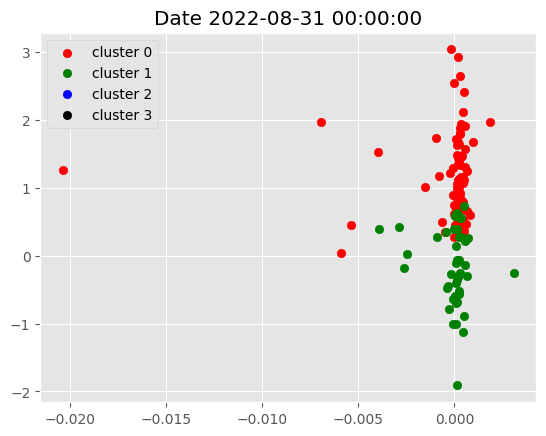

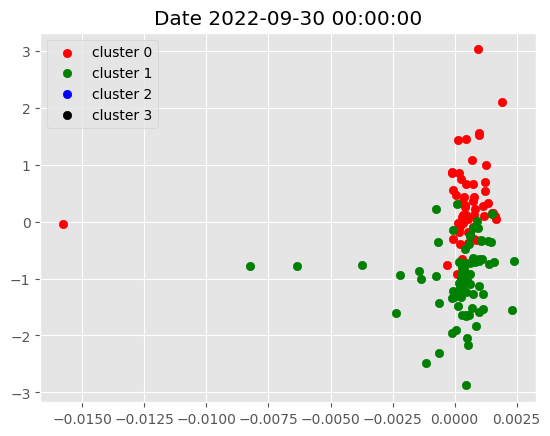

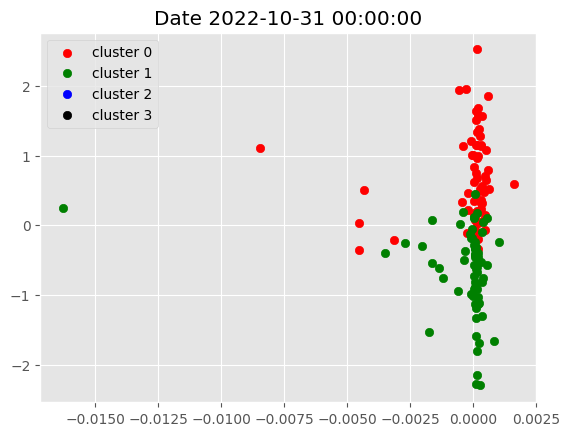

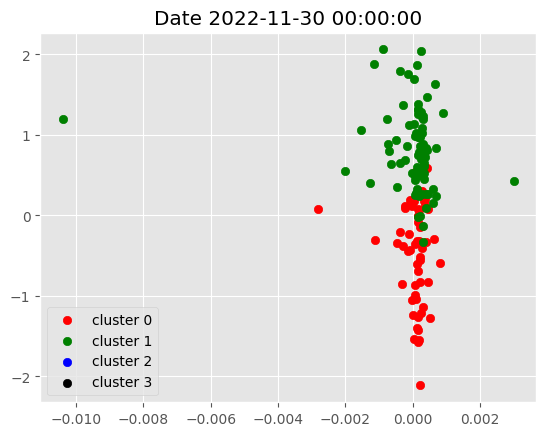

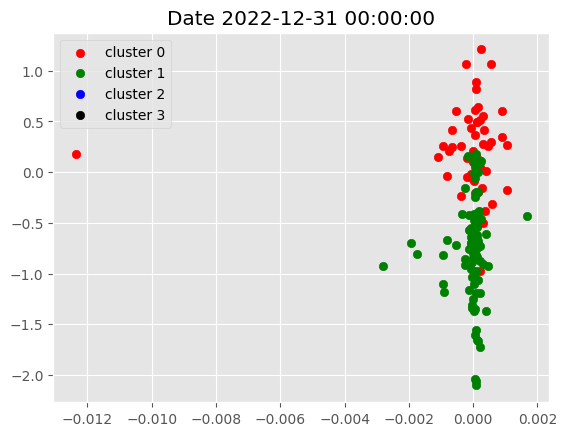

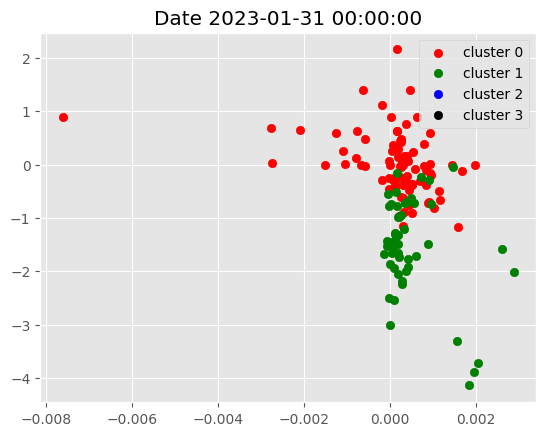

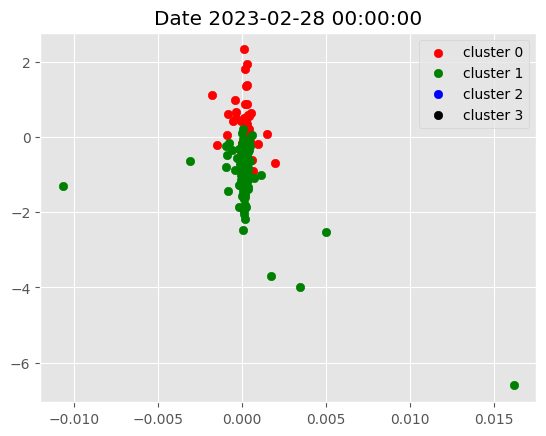

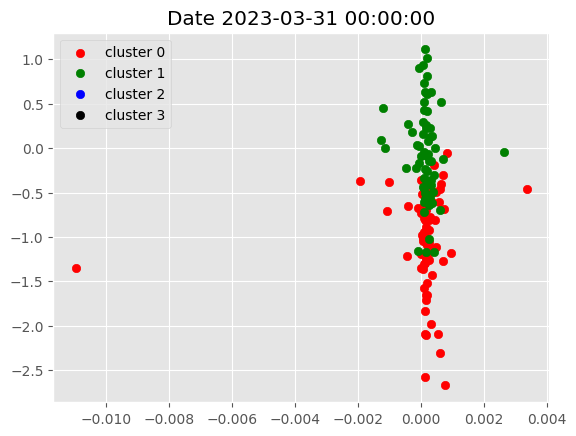

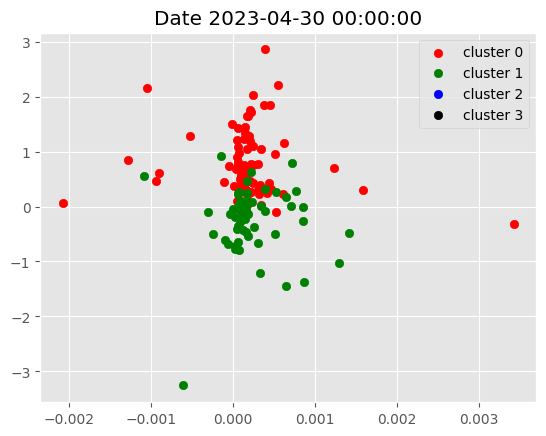

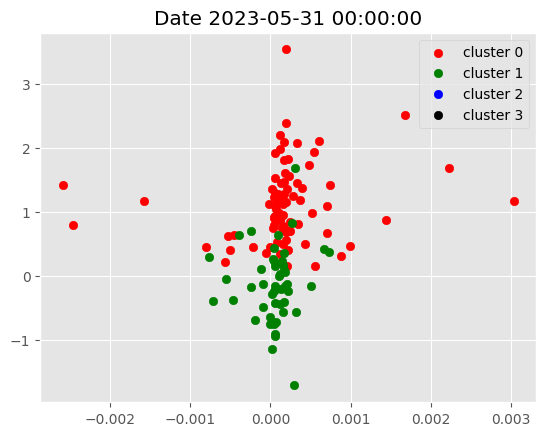

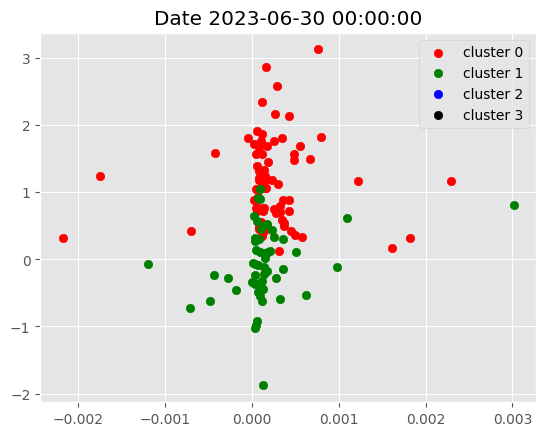

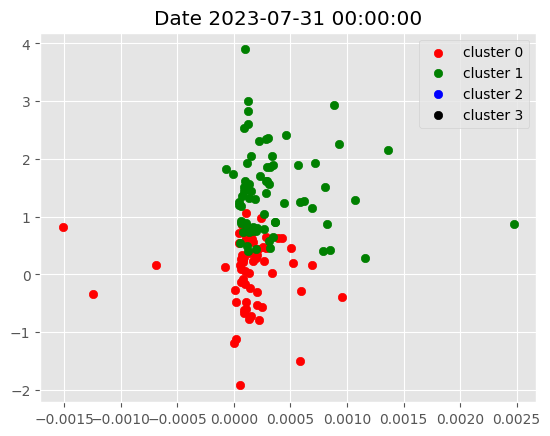

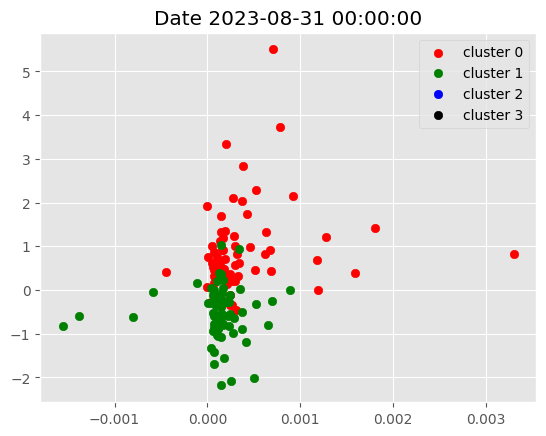

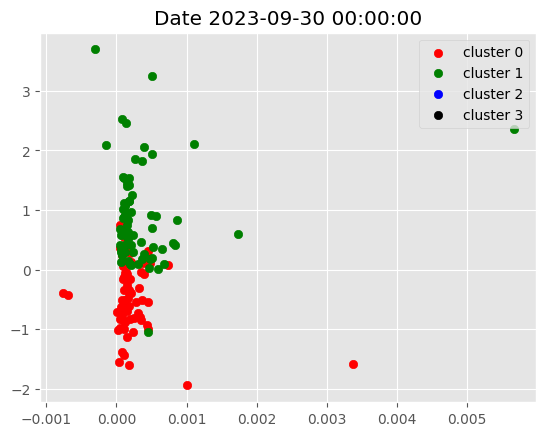

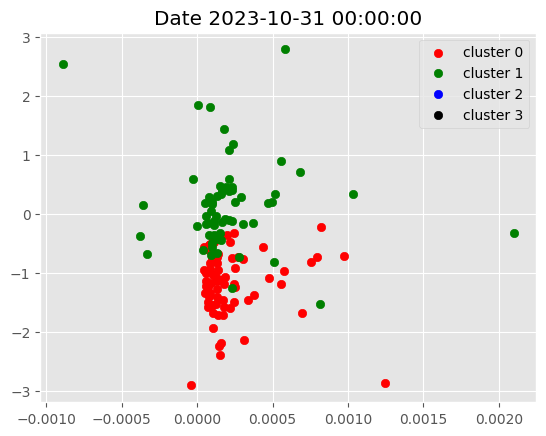

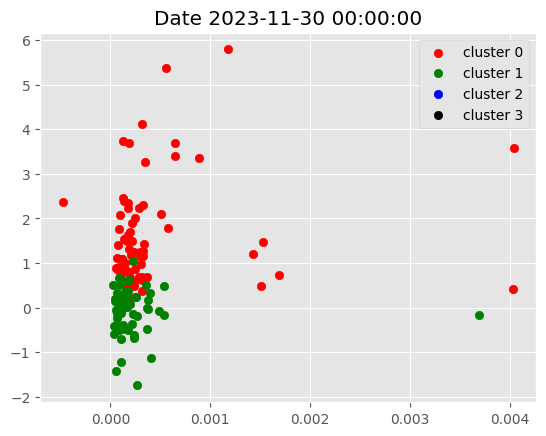

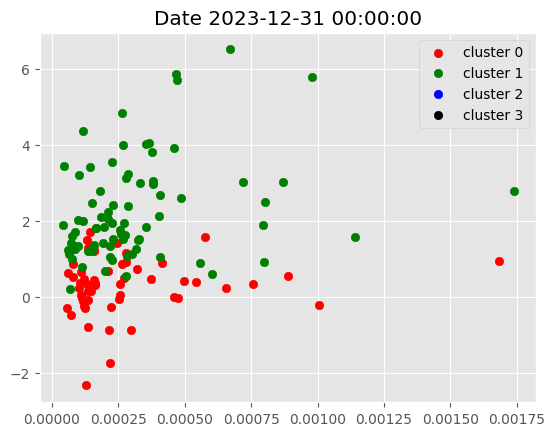

In [37]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [38]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [39]:
filtered_df = data[data['cluster']==1].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2018-02-01': ['ACC.NS',
  'AMBUJACEM.NS',
  'APOLLOTYRE.NS',
  'ASIANPAINT.NS',
  'AUROPHARMA.NS',
  'BAJAJFINSV.NS',
  'BAJFINANCE.NS',
  'BALRAMCHIN.NS',
  'BANKBARODA.NS',
  'BATAINDIA.NS',
  'BEL.NS',
  'BERGEPAINT.NS',
  'BHARATFORG.NS',
  'BHARTIARTL.NS',
  'BOSCHLTD.NS',
  'BPCL.NS',
  'BRITANNIA.NS',
  'CANBK.NS',
  'CANFINHOME.NS',
  'CHOLAFIN.NS',
  'CIPLA.NS',
  'CONCOR.NS',
  'CUMMINSIND.NS',
  'DIVISLAB.NS',
  'DRREDDY.NS',
  'EICHERMOT.NS',
  'FEDERALBNK.NS',
  'GNFC.NS',
  'GRANULES.NS',
  'GRASIM.NS',
  'HAVELLS.NS',
  'HINDALCO.NS',
  'HINDPETRO.NS',
  'IDEA.NS',
  'IDFC.NS',
  'IDFCFIRSTB.NS',
  'IGL.NS',
  'INDIACEM.NS',
  'INDUSTOWER.NS',
  'L&TFH.NS',
  'LICHSGFIN.NS',
  'LUPIN.NS',
  'M&MFIN.NS',
  'MANAPPURAM.NS',
  'MARICO.NS',
  'MCDOWELL-N.NS',
  'MCX.NS',
  'MFSL.NS',
  'MOTHERSON.NS',
  'MRF.NS',
  'MUTHOOTFIN.NS',
  'NESTLEIND.NS',
  'NMDC.NS',
  'NTPC.NS',
  'PAGEIND.NS',
  'PEL.NS',
  'PFC.NS',
  'PNB.NS',
  'POWERGRID.NS',
  'RAMCOCEM.NS',
  'RECLTD.NS

In [40]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [41]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  148 of 148 completed


Adj Close                                                        \
                 ACC.NS  ADANIENT.NS ADANIPORTS.NS AMBUJACEM.NS APOLLOHOSP.NS   
Date                                                                            
2017-01-31  1275.287354    46.530163    281.728943   197.550034   1200.895020   
2017-02-01  1324.954590    48.505630    292.533325   202.164261   1206.020508   
2017-02-02  1291.843018    50.160744    292.101105   199.749344   1201.041382   
2017-02-03  1284.670410    50.481094    291.524933   197.722534   1235.162842   
2017-02-06  1335.420288    51.895950    296.951141   206.649124   1236.920410   
...                 ...          ...           ...          ...           ...   
2023-12-18  2237.250000  2980.600098   1094.300049   525.650024   5498.649902   
2023-12-19  2202.750000  2941.250000   1074.000000   522.349976   5555.500000   
2023-12-20  2086.649902  2783.850098   1012.150024   490.450012   5402.200195   
2023-12-21  2107.399902  2799.750000   1018.950012   503.899994   5475.850098   
2023-12-22  2090.750000  2808.350098   1027.500000   503.799988   5541.399902   

                                                                              \
           APOLLOTYRE.NS ASHOKLEY.NS ASIANPAINT.NS   AUBANK.NS AUROPHARMA.NS   
Date                                                                           
2017-01-31    161.966919   80.983528    926.657593         NaN    652.177612   
2017-02-01    167.847626   82.232880    946.036438         NaN    638.929504   
2017-02-02    165.603073   84.642296    944.127319         NaN    659.782349   
2017-02-03    164.570587   84.329971    941.167725         NaN    654.951660   
2017-02-06    163.538086   84.865387    947.468323         NaN    675.756714   
...                  ...         ...           ...         ...           ...   
2023-12-18    453.049988  175.300003   3332.050049  748.650024   1022.150024   
2023-12-19    455.350006  175.300003   3336.050049  731.299988   1032.849976   
2023-12-20    431.299988  170.000000   3297.149902  760.049988   1032.800049   
2023-12-21    430.250000  169.350006   3302.949951  771.299988   1092.150024   
2023-12-22    427.549988  172.000000   3341.300049  765.450012   1066.400024   

            ...        Volume                                             \
            ... TORNTPHARM.NS TVSMOTOR.NS  UBL.NS ULTRACEMCO.NS   UPL.NS   
Date        ...                                                            
2017-01-31  ...      337750.0      581606  137968        214723  1291596   
2017-02-01  ...      166436.0      989115  155263        289861  3405043   
2017-02-02  ...      302246.0     1502951   98435        239504  2364807   
2017-02-03  ...     1103822.0      760775  141017        203149  2007984   
2017-02-06  ...      979650.0     2338422  172538        150193  2589018   
...         ...           ...         ...     ...           ...      ...   
2023-12-18  ...      568660.0      936244  251146        266562  1685280   
2023-12-19  ...      342287.0     1139789  237101        675166  2396755   
2023-12-20  ...      352547.0      743248  542638        501448  5509320   
2023-12-21  ...      272796.0      733570  161896        216730  3089260   
2023-12-22  ...      288655.0     1070784  354584        226940  2464945   

                                                                 
             VEDL.NS VOLTAS.NS  WIPRO.NS   ZEEL.NS ZYDUSLIFE.NS  
Date                                                             
2017-01-31   8807048   1612843   7314203    852786      4568005  
2017-02-01   8526260   1862732   4375377   1553861      1288758  
2017-02-02   8017203   1355490   4085865   2282533      1110384  
2017-02-03   9854523   1466321   2341226   2404103       677047  
2017-02-06   6348749   1812553   3299759   1204460      1070855  
...              ...       ...       ...       ...          ...  
2023-12-18  12388584   1863543  10091036  26259529      6969702  
2023-12-19  17762921   4021526   

In [42]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2019-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-06-01, Continuing with Equal-Weights
'return'


,Strategy Return
date,
2018-02-01,-0.005663
2018-02-02,-0.035708
2018-02-05,0.004143
2018-02-06,-0.017379
2018-02-07,0.009698
...,...
2023-12-18,-0.001722
2023-12-19,0.005469
2023-12-20,-0.027933


In [20]:


spy = yf.download(tickers='NSE',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'NSE Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df



[*********************100%%**********************]  1 of 1 completed


,Strategy Return,NSE Buy&Hold
2018-02-01,-0.001178,0.000000
2018-02-02,-0.036867,0.012121
2018-02-05,0.001155,-0.012121
2018-02-06,-0.017875,-0.012270
2018-02-07,0.012061,0.012270
...,...,...
2022-02-23,-0.003154,-0.048790
2022-02-24,-0.057136,-0.007528
2022-02-25,0.039142,-0.017790
2022-02-28,0.011795,-0.002567


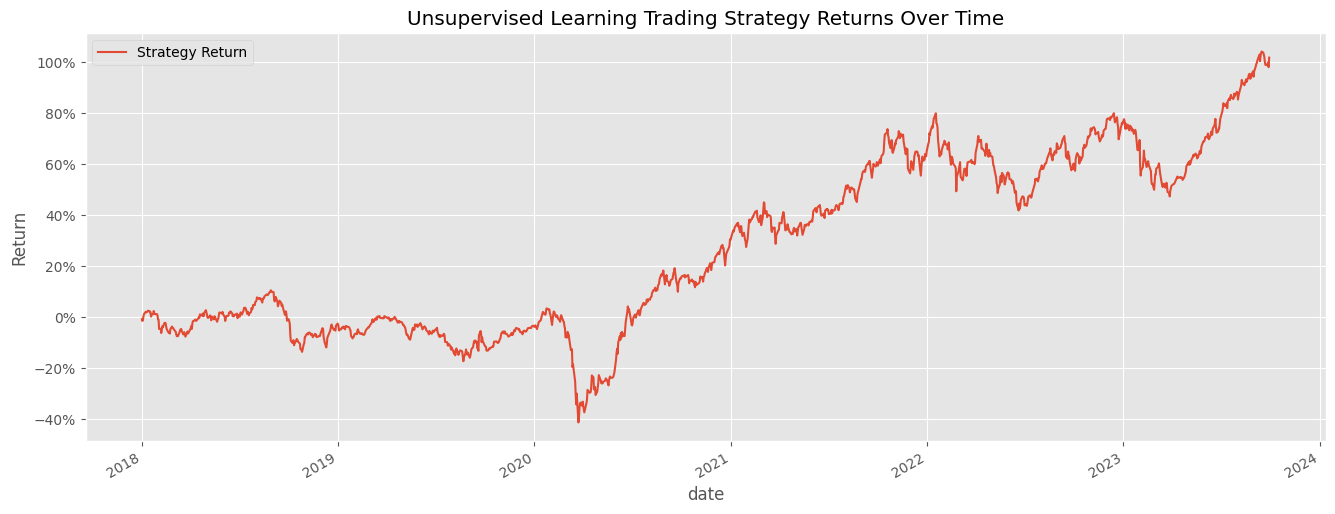

In [287]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()